In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import scipy.stats as stats

In [117]:
df = pd.read_csv("stu_dropout.csv", sep=";")

## EDA

In [68]:
df.shape

(4424, 37)

In [69]:
df.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [70]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [118]:
df.columns = [col.lower().replace(" ", "_") for col in df.columns]  # cleaner col names

In [119]:
df.rename(columns={"daytime/evening_attendance\t":"day/eve_attend"}, inplace=True)

In [82]:
df.dtypes
# many dtypes are not accurate or what we want

marital_status                                      int64
application_mode                                    int64
application_order                                   int64
course                                              int64
day/eve_attend                                      int64
previous_qualification                              int64
previous_qualification_(grade)                    float64
nacionality                                         int64
mother's_qualification                              int64
father's_qualification                              int64
mother's_occupation                                 int64
father's_occupation                                 int64
admission_grade                                   float64
displaced                                           int64
educational_special_needs                           int64
debtor                                              int64
tuition_fees_up_to_date                             int64
gender        

In [120]:
# correcting column dtypes
cat_cols = ["marital_status", "application_mode", "course", "day/eve_attend", "previous_qualification",
           "nacionality","mother's_qualification","father's_qualification", "mother's_occupation","father's_occupation",
           "displaced","educational_special_needs","debtor","tuition_fees_up_to_date","gender","scholarship_holder",
           "international"]

for col in cat_cols:
    df[col] = df[col].astype("category")

In [121]:
# now we need to one hot encode
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


ct = ColumnTransformer(
    transformers=[
        ("encoder", OneHotEncoder(drop='first', sparse_output=False), cat_cols) # not taking target from cat_cols
    ],
    remainder = 'passthrough' # non encoding columns gets passed including target
)

df_encoded = ct.fit_transform(df)

encoded_cols = ct.named_transformers_["encoder"].get_feature_names_out(cat_cols)

df_encoded = pd.DataFrame(df_encoded, columns=list(encoded_cols) + list(df.drop(columns=cat_cols).columns))



In [122]:
df = df_encoded

In [123]:
df.shape

(4424, 239)

In [124]:
df.sample(8)

,marital_status_2,marital_status_3,marital_status_4,marital_status_5,marital_status_6,application_mode_2,application_mode_5,application_mode_7,application_mode_10,application_mode_15,...,curricular_units_2nd_sem_(credited),curricular_units_2nd_sem_(enrolled),curricular_units_2nd_sem_(evaluations),curricular_units_2nd_sem_(approved),curricular_units_2nd_sem_(grade),curricular_units_2nd_sem_(without_evaluations),unemployment_rate,inflation_rate,gdp,target
1684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,6,8,5,13.0,0,10.8,1.4,1.74,Graduate
4382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,8,8,7,15.0,0,12.7,3.7,-1.7,Graduate
3596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,6,12,3,12.75,0,15.5,2.8,-4.06,Enrolled
3366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,5,10,3,12.0,0,7.6,2.6,0.32,Enrolled
763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,5,10,1,10.0,0,11.1,0.6,2.02,Enrolled
1561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,6,10,4,14.25,0,12.4,0.5,1.79,Enrolled
3081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,8,8,8,12.575,0,12.4,0.5,1.79,Graduate
1865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,5,5,5,12.4,0,15.5,2.8,-4.06,Graduate


In [125]:
df.dtypes

marital_status_2                                  object
marital_status_3                                  object
marital_status_4                                  object
marital_status_5                                  object
marital_status_6                                  object
                                                   ...  
curricular_units_2nd_sem_(without_evaluations)    object
unemployment_rate                                 object
inflation_rate                                    object
gdp                                               object
target                                            object
Length: 239, dtype: object

In [49]:
df.duplicated().sum()

0

In [50]:
df.isna().sum()

marital_status_1                                  0
marital_status_2                                  0
marital_status_3                                  0
marital_status_4                                  0
marital_status_5                                  0
                                                 ..
curricular_units_2nd_sem_(without_evaluations)    0
unemployment_rate                                 0
inflation_rate                                    0
gdp                                               0
target                                            0
Length: 256, dtype: int64

In [33]:
df['course'].value_counts()

course
9500    766
9147    380
9238    355
9085    337
9773    331
9991    268
9670    268
9254    252
9070    226
8014    215
171     215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: count, dtype: int64

In [34]:
df["father's_occupation"].value_counts()

father's_occupation
9      1010
7       666
5       516
4       386
3       384
8       318
10      266
6       242
2       197
1       134
0       128
90       65
99       19
193      15
171       8
144       8
192       6
163       5
175       4
103       4
183       3
135       3
181       3
152       3
123       3
172       2
122       2
151       2
112       2
102       2
194       2
182       2
101       1
134       1
131       1
114       1
121       1
124       1
141       1
143       1
132       1
161       1
174       1
153       1
154       1
195       1
Name: count, dtype: int64

### Basic statistical tests

In [35]:
contingency = pd.crosstab(df["marital_status"], df["target"])
chi2, p, dof, ex = chi2_contingency(contingency)
print("Chi-square test p-value:", p)

# p value is less than 0.05 significance level
# so it means the relationship between marital_status and target is significant.

Chi-square test p-value: 8.054279703889306e-10


In [36]:
groups = [df[df["target"] == cat]["previous_qualification_(grade)"].dropna()
          for cat in df["target"].unique()]
f, p = stats.f_oneway(*groups)
print("ANOVA p-value:", p)

# Since p-value is <0.05 we can say that at least one target group has different mean grade value than others.

ANOVA p-value: 1.0777825583187265e-12


### Visualizations

/var/folders/0v/csq0yj4973n1j6g1r8pck_0m0000gn/T/ipykernel_6590/3470697595.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Single", "Married", "Widower", "Divorced", "Union", "Separated"])


[Text(0, 0, 'Single'),
 Text(1, 0, 'Married'),
 Text(2, 0, 'Widower'),
 Text(3, 0, 'Divorced'),
 Text(4, 0, 'Union'),
 Text(5, 0, 'Separated')]

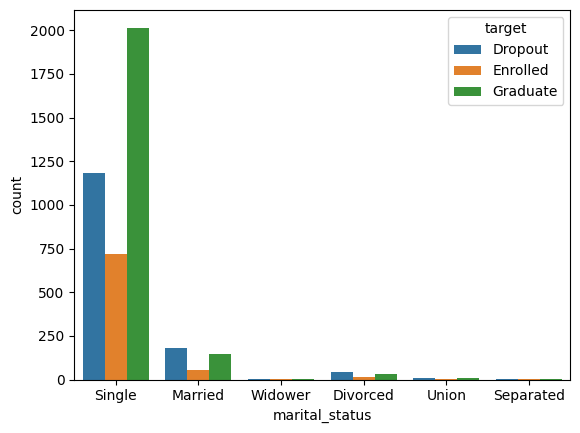

In [37]:
ax = sns.countplot(data=df, x='marital_status', hue='target')
ax.set_xticklabels(["Single", "Married", "Widower", "Divorced", "Union", "Separated"])

# most of the students are single, so all three levels are in single category mostly.
# besides that point, it's not as informative. 
# One small thing to note is that Married group has more dropouts than graduates and enrolled in it. 

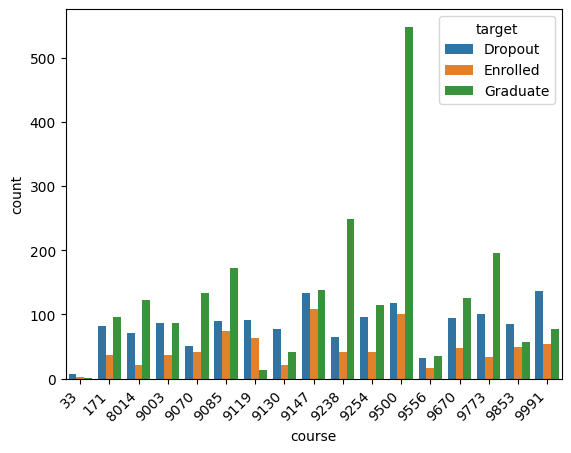

In [38]:
ax = sns.countplot(data=df, x='course', hue='target')
plt.xticks(rotation=45, ha='right')   
plt.show()

# main aim was to see which course has more dropouts in general.
# But dropout rate seems to be uniform.

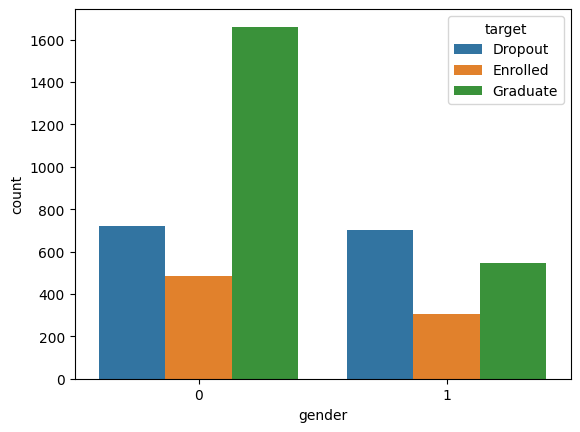

In [39]:
ax = sns.countplot(data = df, x='gender', hue = 'target')
# ax = sns.countplot(data = df, x='gender')

In [40]:
import pickle

# after preprocessing
with open("preprocessed.pkl", "wb") as f:
    pickle.dump(df, f)
